# Lab | Customer Analysis Round 4
## Complete the following task
1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2. Now we will try to check the normality of the numerical variables visually
    * Use seaborn library to construct distribution plots for the numerical variables
    * Use Matplotlib to construct histograms
    * Do the distributions for different numerical variables look like a normal distribution
3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [52]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df=pd.read_csv('marketing_customer_analysis.csv')
df.columns=df.columns.map(lambda x: x.lower())
df

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


## 1.

In [93]:
df.dtypes

unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [94]:
df=df.drop(columns=['customer','unnamed: 0','vehicle type'],axis=1)
df

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [95]:
df.numerical=df.select_dtypes(exclude=['object'])
df.numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [104]:
df.numerical.isnull().sum()

customer lifetime value          0
income                           0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
total claim amount               0
dtype: int64

In [100]:
df.numerical['months since last claim']= df.numerical['months since last claim'].fillna(np.mean(df.numerical['months since last claim']))
df.numerical['number of open complaints']= df.numerical['number of open complaints'].fillna(np.mean(df.numerical['number of open complaints']))

In [97]:
df.categorical=df.select_dtypes(include = np.object)
df.categorical

,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [102]:
df.categorical['state'].fillna(df.categorical['state'].mode()[0], inplace=True)
df.categorical['response'].fillna(df.categorical['response'].mode()[0], inplace=True)
df.categorical['vehicle class'].fillna(df.categorical['vehicle class'].mode()[0], inplace=True)
df.categorical['vehicle size'].fillna(df.categorical['vehicle size'].mode()[0], inplace=True)

In [103]:
df.categorical.isnull().sum()

state                0
response             0
coverage             0
education            0
effective to date    0
employmentstatus     0
gender               0
location code        0
marital status       0
policy type          0
policy               0
renew offer type     0
sales channel        0
vehicle class        0
vehicle size         0
dtype: int64

## 2.

<AxesSubplot:xlabel='customer lifetime value', ylabel='Density'>

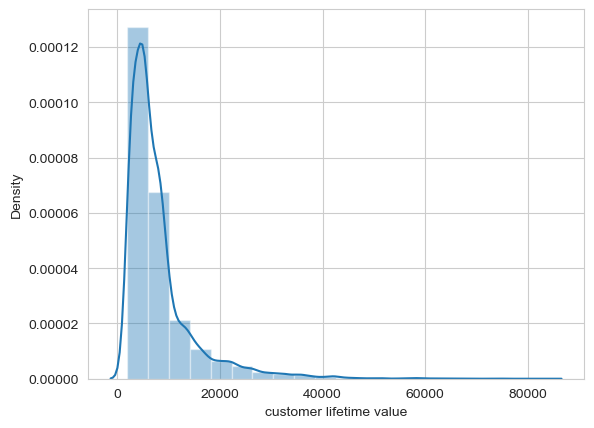

In [107]:
sns.distplot(df.numerical['customer lifetime value'],bins=20)

<AxesSubplot:xlabel='income', ylabel='Density'>

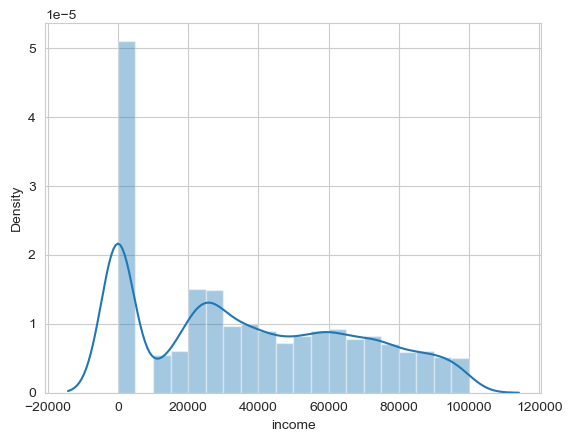

In [108]:
sns.distplot(df.numerical['income'],bins=20)

<AxesSubplot:xlabel='monthly premium auto', ylabel='Density'>

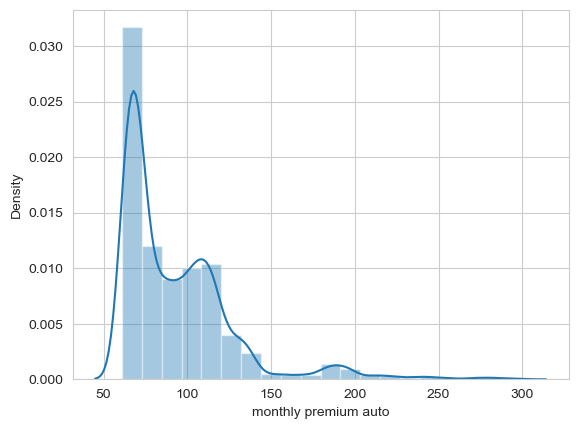

In [109]:
sns.distplot(df.numerical['monthly premium auto'],bins=20)

<AxesSubplot:xlabel='months since last claim', ylabel='Density'>

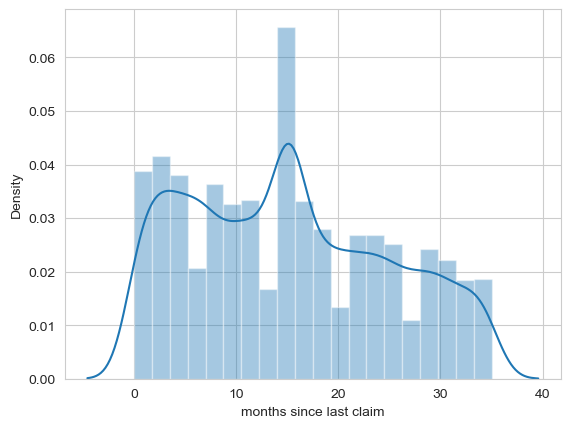

In [110]:
sns.distplot(df.numerical['months since last claim'],bins=20)

<AxesSubplot:xlabel='months since policy inception', ylabel='Density'>

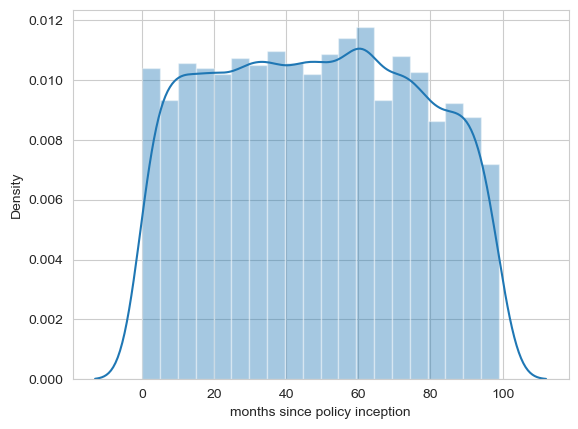

In [111]:
sns.distplot(df.numerical['months since policy inception'],bins=20)

<AxesSubplot:xlabel='number of open complaints', ylabel='Density'>

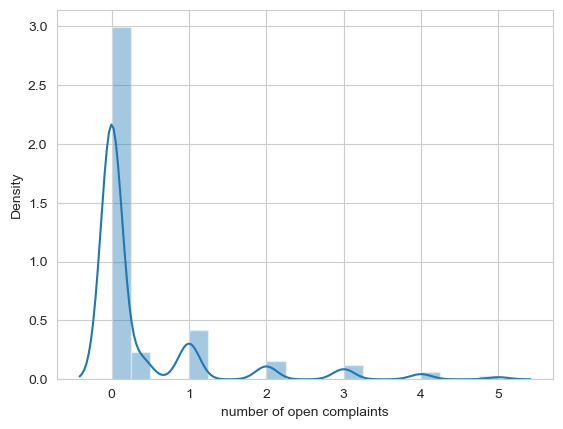

In [112]:
sns.distplot(df.numerical['number of open complaints'],bins=20)

<AxesSubplot:xlabel='number of policies', ylabel='Density'>

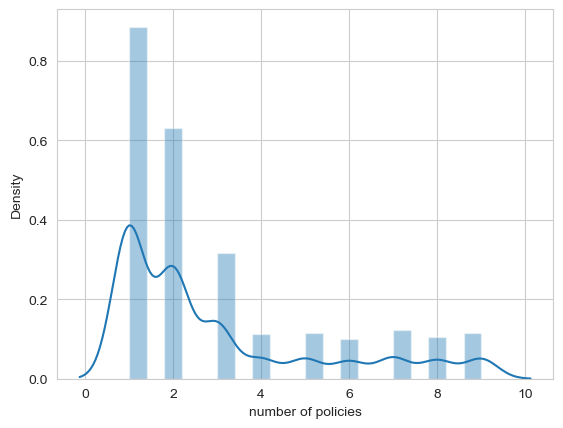

In [113]:
sns.distplot(df.numerical['number of policies'],bins=20)

<AxesSubplot:xlabel='total claim amount', ylabel='Density'>

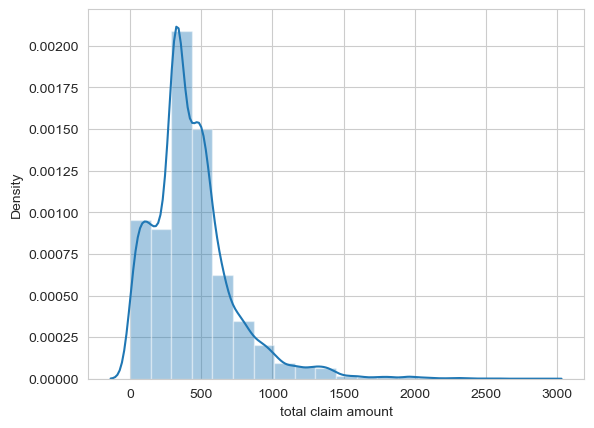

In [114]:
sns.distplot(df.numerical['total claim amount'],bins=20)

In [65]:
#plt.hist(numerical,bins=5)

<AxesSubplot:>

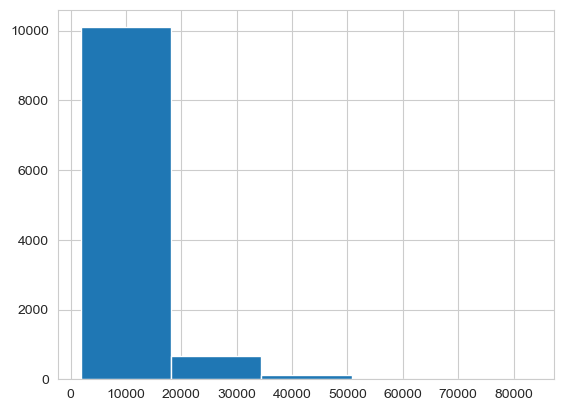

In [115]:
df.numerical['customer lifetime value'].hist(bins=5)

<AxesSubplot:>

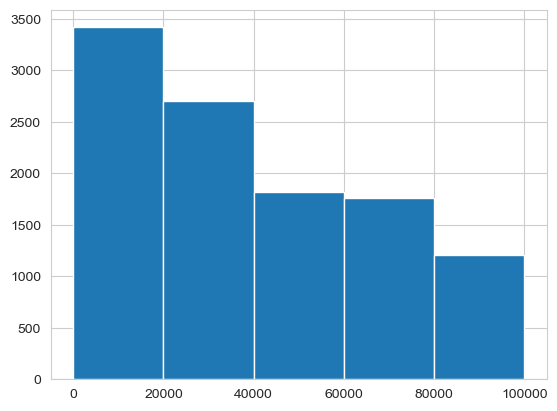

In [116]:
df.numerical['income'].hist(bins=5)

<AxesSubplot:>

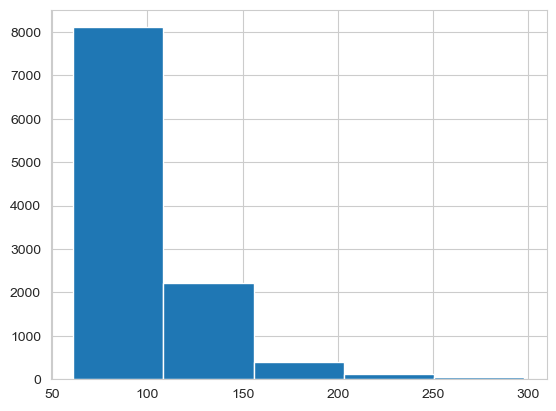

In [117]:
df.numerical['monthly premium auto'].hist(bins=5)

<AxesSubplot:>

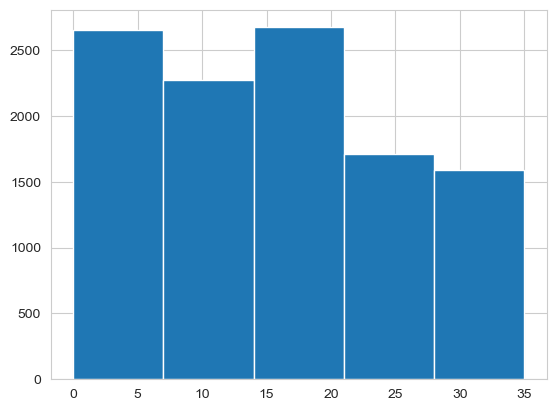

In [118]:
df.numerical['months since last claim'].hist(bins=5)

<AxesSubplot:>

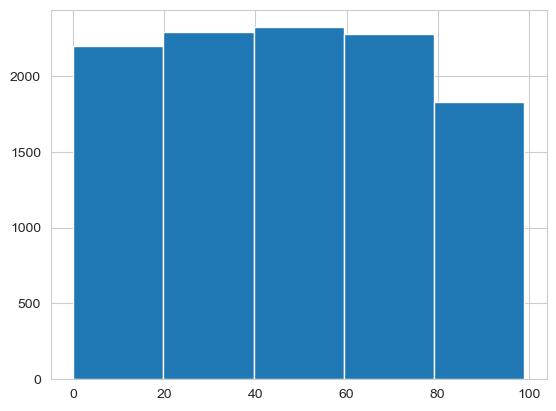

In [119]:
df.numerical['months since policy inception'].hist(bins=5)

<AxesSubplot:>

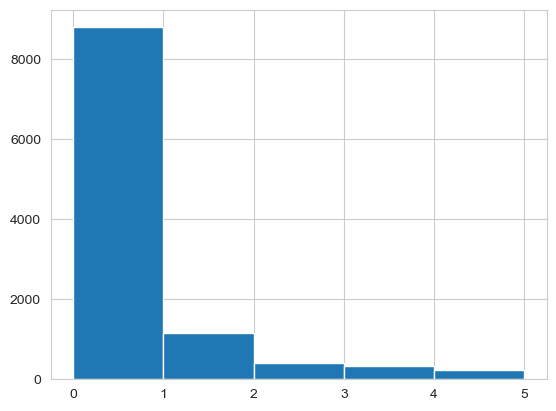

In [120]:
df.numerical['number of open complaints'].hist(bins=5)

<AxesSubplot:>

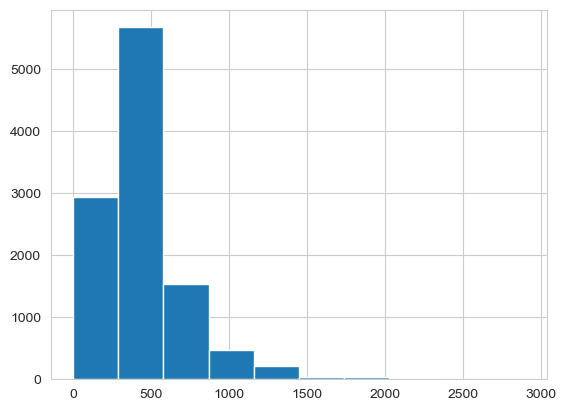

In [121]:
df.numerical['total claim amount'].hist(bins=10)

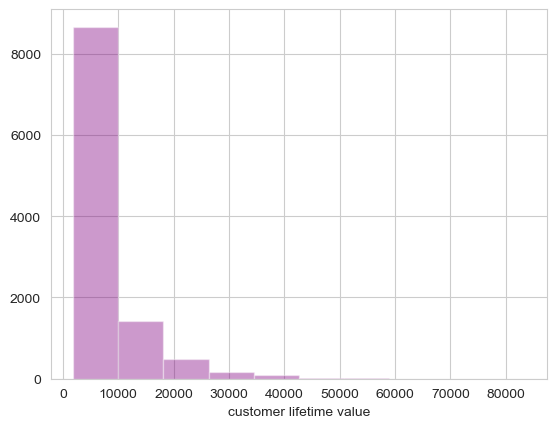

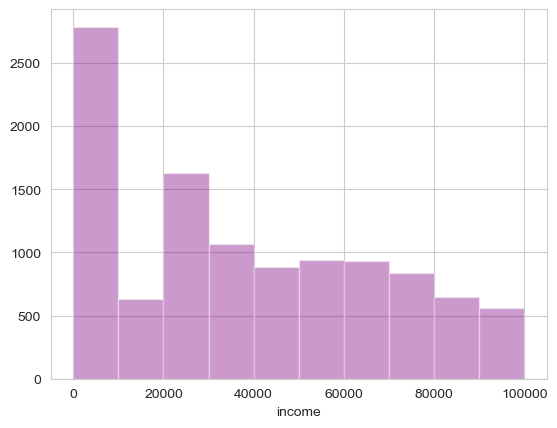

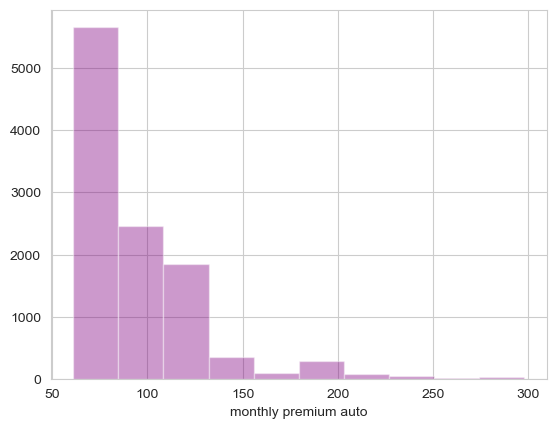

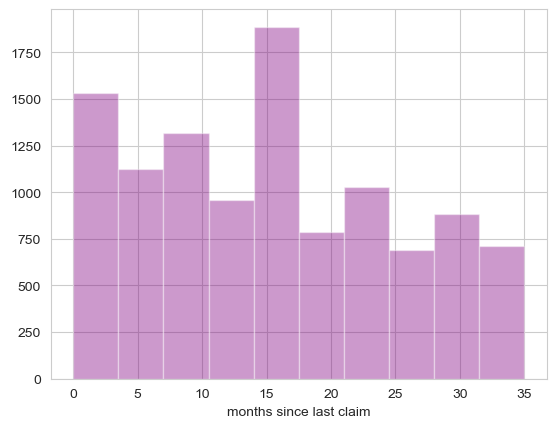

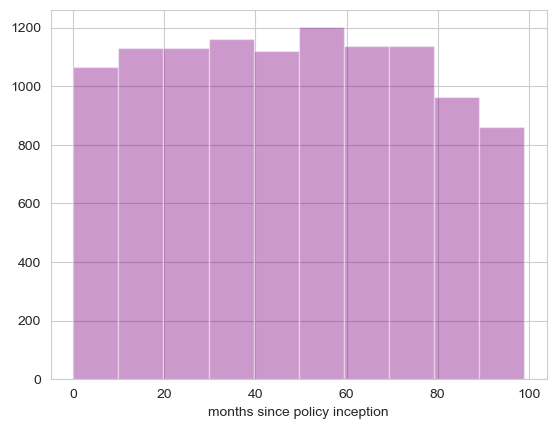

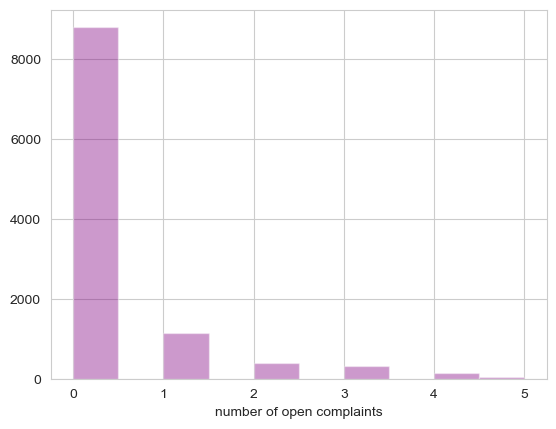

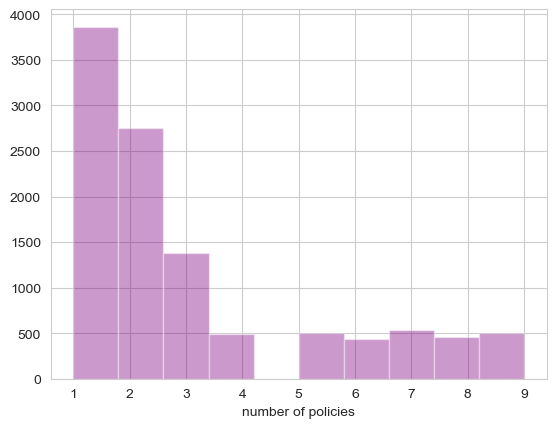

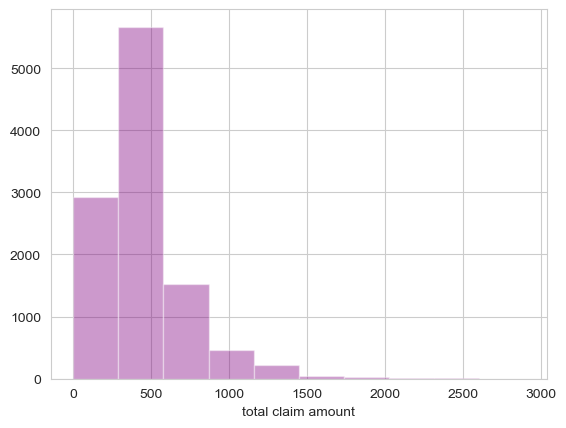

In [122]:
sns.set_style('whitegrid')

for i in numerical:
  sns.distplot(df.numerical[i], kde = False, color ='purple', bins = 10)
  plt.show()

### The distributions of the different numerical variables do not look like normal distributions.

# 3.

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_numerical = pd.DataFrame()
vif_numerical["feature"] = df.numerical.columns
vif_numerical["VIF"] = [variance_inflation_factor(df.numerical.values, i) for i in range(len(df.numerical.columns))]
vif_numerical

,feature,VIF
0,customer lifetime value,2.823277
1,income,2.846892
2,monthly premium auto,14.168705
3,months since last claim,2.897655
4,months since policy inception,3.270282
5,number of open complaints,1.176636
6,number of policies,2.293516
7,total claim amount,6.660699


# 4.

In [124]:
corr_matrix=numerical.corr()
corr_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.028186,0.400924,0.016052,0.015130,-0.032243,0.017150,0.233250
income,0.028186,1.000000,-0.008384,-0.023814,-0.009282,0.007163,-0.008250,-0.350660
monthly premium auto,0.400924,-0.008384,1.000000,0.008744,0.021881,-0.010350,-0.019203,0.633054
months since last claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months since policy inception,0.015130,-0.009282,0.021881,-0.039318,1.000000,0.004376,-0.008141,0.006861
number of open complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number of policies,0.017150,-0.008250,-0.019203,0.007678,-0.008141,0.004098,1.000000,-0.006182
total claim amount,0.233250,-0.350660,0.633054,0.013137,0.006861,-0.011379,-0.006182,1.000000


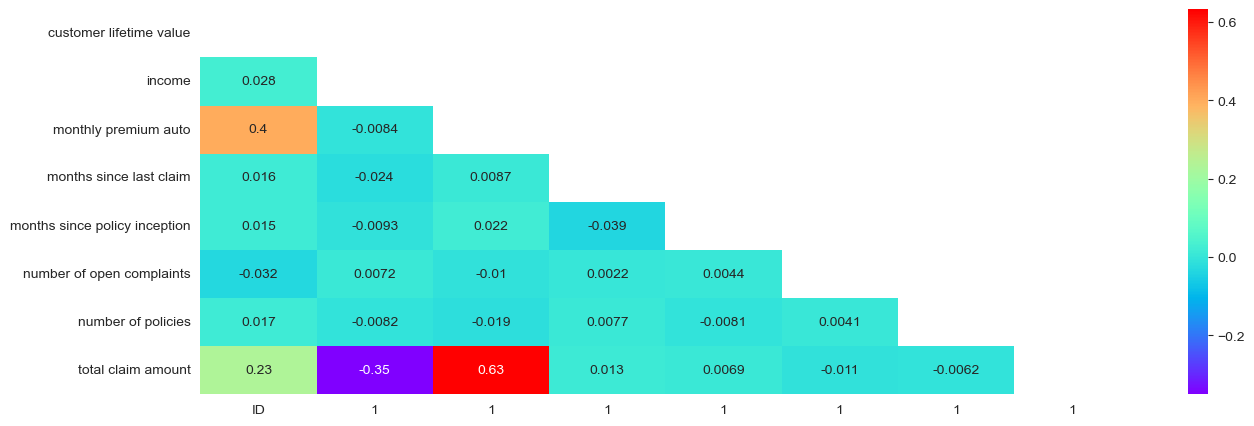

In [125]:
mask=np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots(figsize=(15,5))
ax=sns.heatmap(corr_matrix,mask=mask,annot=True,cmap='rainbow',xticklabels=['ID',1,1,1,1,1,1,1])